In [1]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth

from typing import Dict, List, Any
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,5)

import random
import warnings
warnings.filterwarnings("ignore")

In [2]:
class SpotifyService():
    def __init__(self, scope) -> None:
        self.scope = scope
        self.spotify = spotipy.Spotify(auth_manager=SpotifyOAuth(scope=scope))
        # TODO: put these into sub functions
        #self.saved_tracks = self.current_user_saved_tracks()
        self.saved_tracks = [*self.current_user_saved_tracks(), *self.current_user_saved_album_tracks(),
                             *self.get_recently_played()]

    def get_recently_played(self) -> List[Dict]:
        r = self.spotify.current_user_recently_played(limit=50)
        recently_played = []
        saved_tracks = []
        for idx, item in enumerate(r['items']):
            track_dict = self._create_track_dict(item)
            saved_tracks.append(track_dict)
            print(idx, track_dict['artist_name'],
                  " – ", track_dict['track_name'])
        return saved_tracks
    
    def current_user_saved_tracks(self) -> List[Dict]:
        r = self.spotify.current_user_saved_tracks(limit=50)
        saved_tracks = []
        for idx, item in enumerate(r['items']):
            track_dict = self._create_track_dict(item)
            saved_tracks.append(track_dict)
        return saved_tracks
    
    def current_user_saved_album_tracks(self)-> Dict:
        r = self.spotify.current_user_saved_albums(limit=50)
        saved_tracks = []
        for idx, album in enumerate(r['items']):
            album = album['album']
            for track_idx in range(album['total_tracks']):
                track_dict = {}
                track_dict['track_id'] = album['tracks']['items'][track_idx]['id']
                track_dict['track_uri'] = album['tracks']['items'][track_idx]['uri']
                track_dict['track_name'] = album['tracks']['items'][track_idx]['name']
                track_dict['artist_name'] = album['artists'][0]['name']
                track_dict['artist_id'] = album['artists'][0]['id']
                track_dict['artist_uri'] = album['artists'][0]['uri']
                saved_tracks.append(track_dict)
        
        return saved_tracks
        
    def get_audio_analyis(self, limit=50, track_ids=None)-> Dict:
        if track_ids==None:
            track_ids = [track['track_uri'] for track in self.saved_tracks] 
            r = self.spotify.audio_features(tracks=track_ids[:limit])
            saved_tracks_audio_analysis = saved_tracks_audio_analysis = dict(zip(track_ids, r))
        else:
            r = self.spotify.audio_features(tracks=track_ids)
            saved_tracks_audio_analysis = dict(zip(track_ids, r))
        return saved_tracks_audio_analysis

    def get_saved_tracks(self):
        return self.saved_tracks
    
    def make_playlist(self, name, tracks):
        p_response = self._create_playlist(name)
        playlist_id = p_response['id']
        self._add_songs_to_playlist(playlist_id=playlist_id, items=tracks)
    
    def _create_playlist(self, name):
        return self.spotify.user_playlist_create(user='caitray1', name=name, public=False, collaborative=False, description='Testing')
    
    def _add_songs_to_playlist(self, playlist_id, items):
        return self.spotify.playlist_add_items(playlist_id, items, position=None)

    def _create_track_dict(self, item):
        track_dict = {}
        track_dict['track_name'] = item['track']['name']
        track_dict['track_id'] = item['track']['id']
        track_dict['track_uri'] = item['track']['uri']
        track_dict['artist_name'] = item['track']['artists'][0]['name']
        track_dict['artist_id'] = item['track']['artists'][0]['id']
        track_dict['artist_uri'] = item['track']['artists'][0]['uri']
        track_dict['popularity'] = item['track']['popularity']
        track_dict['duration_ms'] = item['track']['duration_ms']
        return track_dict



In [3]:
spotify = SpotifyService(scope='user-read-recently-played user-library-read playlist-modify-public playlist-modify-private')

0 Damien Rice  –  The Blower's Daughter
1 Gabby Barrett  –  I Hope
2 Priscilla Block  –  Just About Over You
3 A R I Z O N A  –  Oceans Away
4 alt-J  –  Something Good
5 Anthony Ramos  –  The Story of Tonight - Reprise
6 Removebeforeflight  –  School Globes
7 Hozier  –  Jackie And Wilson - Live Performance
8 Valley  –  There's Still A Light In The House
9 The Magic Gang  –  Somebody Like You
10 ABBA  –  If It Wasn't For The Nights
11 Biffy Clyro  –  Tiny Indoor Fireworks
12 Vistas  –  Sucker - Recorded at Parr Street Studios
13 Liam Gallagher  –  Now That I've Found You
14 Ryn Weaver  –  Pierre
15 Tal Bachman  –  She's so High
16 Sea Girls  –  Transplant
17 Sea Girls  –  Ready For More
18 Gabby Barrett  –  I Hope
19 Bernie Taupin  –  We Built This City / We're Not Gonna Take It
20 Steve Perry  –  Any Way You Want It
21 Lou Gramm  –  Waiting For A Girl Like You
22 Eddie Schwartz  –  Hit Me With Your Best Shot
23 Luke Bryan  –  Waves
24 Kenny Chesney  –  Knowing You
25 Kenny Chesney  –  

In [4]:
spotify.saved_tracks[0]

{'track_name': 'Something Good',
 'track_id': '4VPZX5qq0mujdIrVhLFROu',
 'track_uri': 'spotify:track:4VPZX5qq0mujdIrVhLFROu',
 'artist_name': 'alt-J',
 'artist_id': '3XHO7cRUPCLOr6jwp8vsx5',
 'artist_uri': 'spotify:artist:3XHO7cRUPCLOr6jwp8vsx5',
 'popularity': 59,
 'duration_ms': 218240}

In [5]:
len(spotify.saved_tracks)

688

In [6]:
audio_analysis = spotify.get_audio_analyis()
audio_analysis

{'spotify:track:4VPZX5qq0mujdIrVhLFROu': {'danceability': 0.682,
  'energy': 0.589,
  'key': 7,
  'loudness': -10.361,
  'mode': 1,
  'speechiness': 0.0295,
  'acousticness': 0.731,
  'instrumentalness': 0.486,
  'liveness': 0.0791,
  'valence': 0.534,
  'tempo': 108.989,
  'type': 'audio_features',
  'id': '4VPZX5qq0mujdIrVhLFROu',
  'uri': 'spotify:track:4VPZX5qq0mujdIrVhLFROu',
  'track_href': 'https://api.spotify.com/v1/tracks/4VPZX5qq0mujdIrVhLFROu',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4VPZX5qq0mujdIrVhLFROu',
  'duration_ms': 218240,
  'time_signature': 4},
 'spotify:track:6A8dnC0xkiuWN4BshmTB2I': {'danceability': 0.617,
  'energy': 0.642,
  'key': 8,
  'loudness': -8.624,
  'mode': 1,
  'speechiness': 0.0334,
  'acousticness': 0.13,
  'instrumentalness': 0.157,
  'liveness': 0.0929,
  'valence': 0.221,
  'tempo': 105.885,
  'type': 'audio_features',
  'id': '6A8dnC0xkiuWN4BshmTB2I',
  'uri': 'spotify:track:6A8dnC0xkiuWN4BshmTB2I',
  'track_href': 'https:

In [7]:
audio_analysis_df = pd.DataFrame.from_dict(audio_analysis, orient='index')
audio_analysis_df.head(2)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
spotify:track:4VPZX5qq0mujdIrVhLFROu,0.682,0.589,7,-10.361,1,0.0295,0.731,0.486,0.0791,0.534,108.989,audio_features,4VPZX5qq0mujdIrVhLFROu,spotify:track:4VPZX5qq0mujdIrVhLFROu,https://api.spotify.com/v1/tracks/4VPZX5qq0muj...,https://api.spotify.com/v1/audio-analysis/4VPZ...,218240,4
spotify:track:6A8dnC0xkiuWN4BshmTB2I,0.617,0.642,8,-8.624,1,0.0334,0.130,0.157,0.0929,0.221,105.885,audio_features,6A8dnC0xkiuWN4BshmTB2I,spotify:track:6A8dnC0xkiuWN4BshmTB2I,https://api.spotify.com/v1/tracks/6A8dnC0xkiuW...,https://api.spotify.com/v1/audio-analysis/6A8d...,194013,4


In [8]:
audio_analysis_df.describe(include='all')

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
count,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50,50,50,50,50,50.00000,50.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,50,50,50,50,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,audio_features,29OrKlVi8EM1u8VDIlF4qO,spotify:track:2HPB3px8MJZRMfu1L65Z41,https://api.spotify.com/v1/tracks/7BgcyPjuBH6P...,https://api.spotify.com/v1/audio-analysis/5PT8...,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,1,1,1,1,NaN,NaN
mean,0.575700,0.68154,5.780000,-6.760980,0.780000,0.053914,0.203510,0.022486,0.180858,0.522462,123.355100,NaN,NaN,NaN,NaN,NaN,215248.28000,4.020000
std,0.116207,0.20243,3.388396,2.329309,0.418452,0.053328,0.274653,0.087142,0.137802,0.243165,24.043662,NaN,NaN,NaN,NaN,NaN,40719.07491,0.141421
min,0.335000,0.20000,0.000000,-13.569000,0.000000,0.024600,0.000162,0.000000,0.060600,0.074300,75.998000,NaN,NaN,NaN,NaN,NaN,115880.00000,4.000000
25%,0.502750,0.57375,3.250000,-8.500000,1.000000,0.031250,0.008160,0.000000,0.099200,0.358000,109.048250,NaN,NaN,NaN,NaN,NaN,193583.25000,4.000000
50%,0.570500,0.73800,6.000000,-6.250000,1.000000,0.037450,0.054950,0.000022,0.123000,0.546000,122.025500,NaN,NaN,NaN,NaN,NaN,210680.00000,4.000000
75%,0.663250,0.83250,9.000000,-5.206000,1.000000,0.047675,0.289750,0.001486,0.215500,0.702750,134.007500,NaN,NaN,NaN,NaN,NaN,236640.25000,4.000000


In [9]:
AUDIO_FEATURES = ['danceability', 'energy', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']

In [10]:
long_df = pd.melt(audio_analysis_df.reset_index(), id_vars='index', value_vars=AUDIO_FEATURES)
long_df.head(2)

,index,variable,value
0,spotify:track:4VPZX5qq0mujdIrVhLFROu,danceability,0.682
1,spotify:track:6A8dnC0xkiuWN4BshmTB2I,danceability,0.617


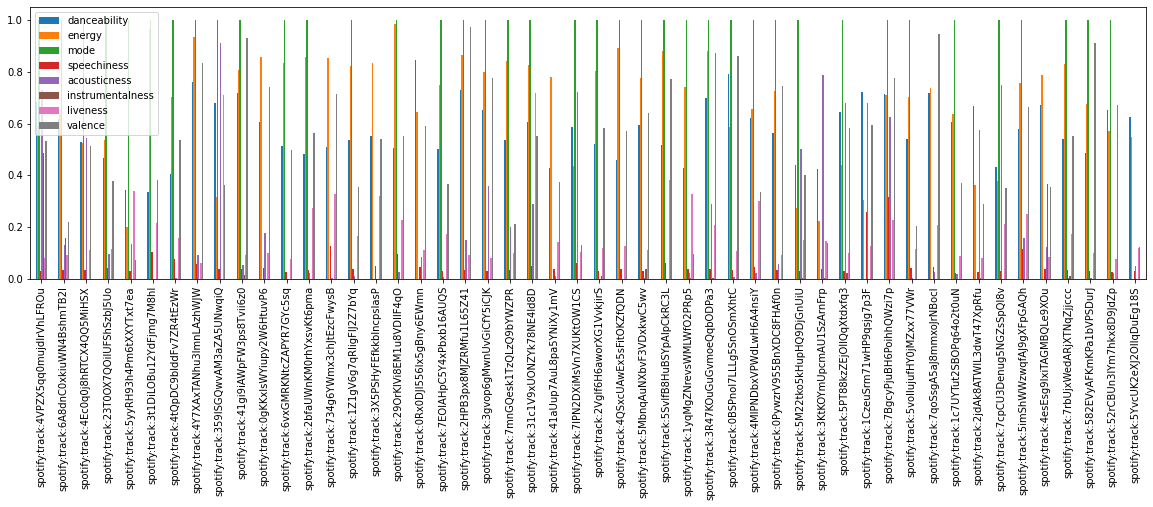

In [11]:
audio_analysis_df[AUDIO_FEATURES].plot(kind='bar');

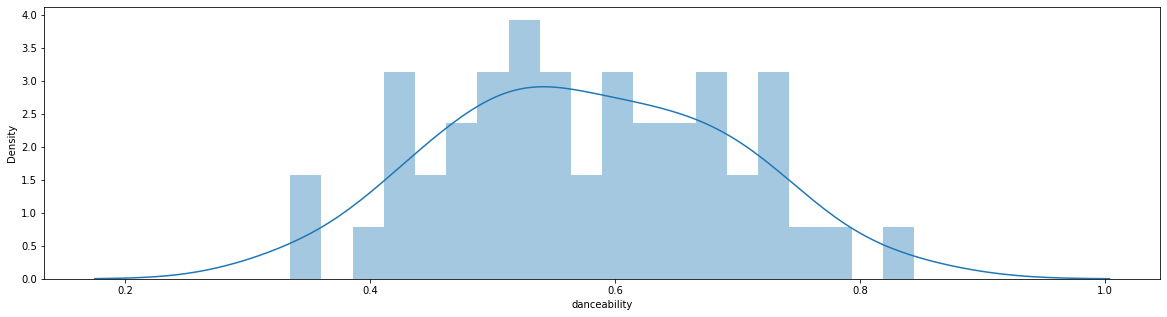

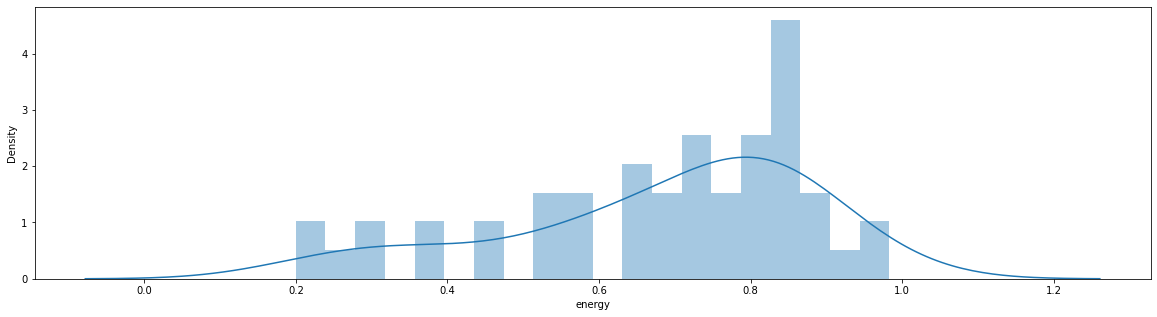

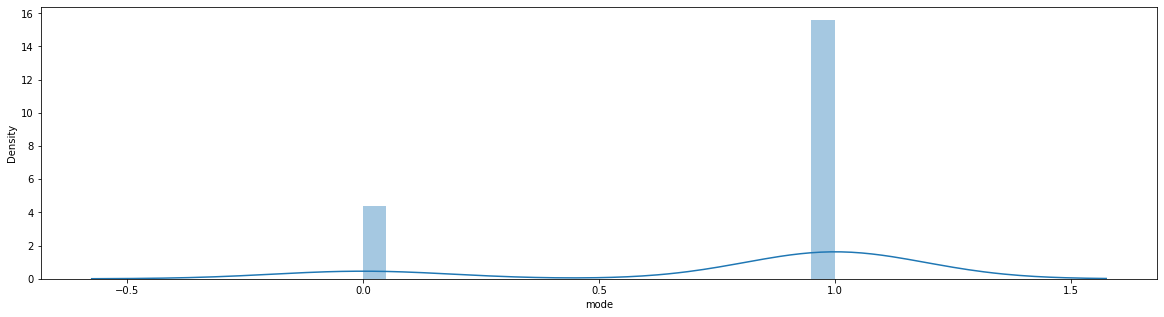

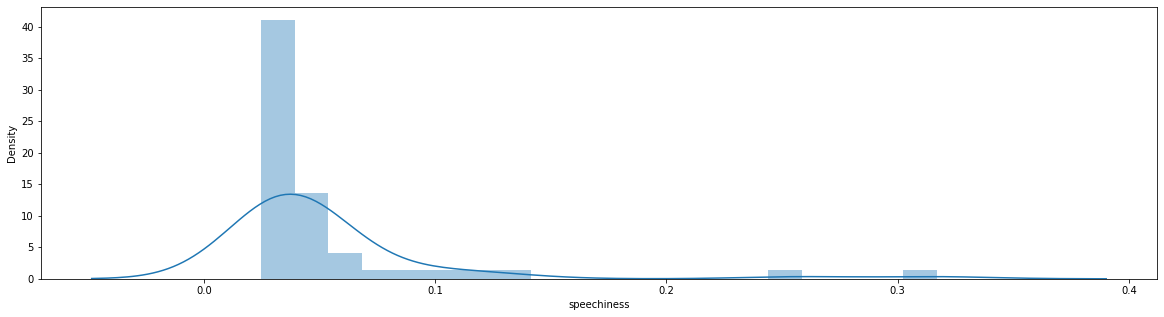

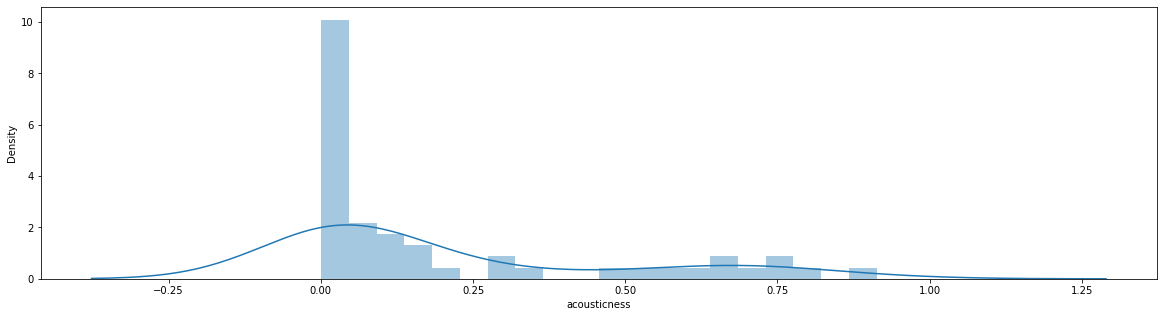

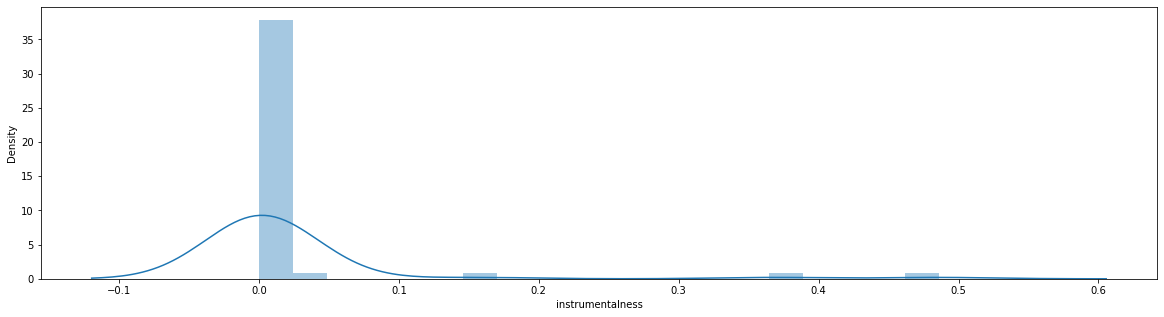

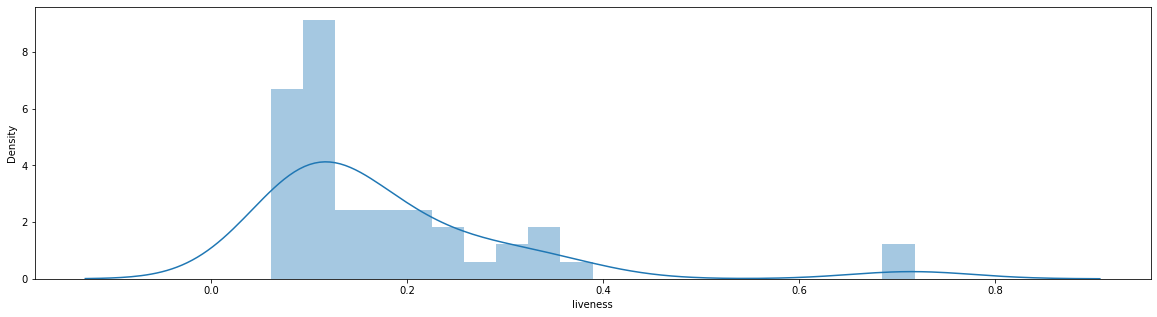

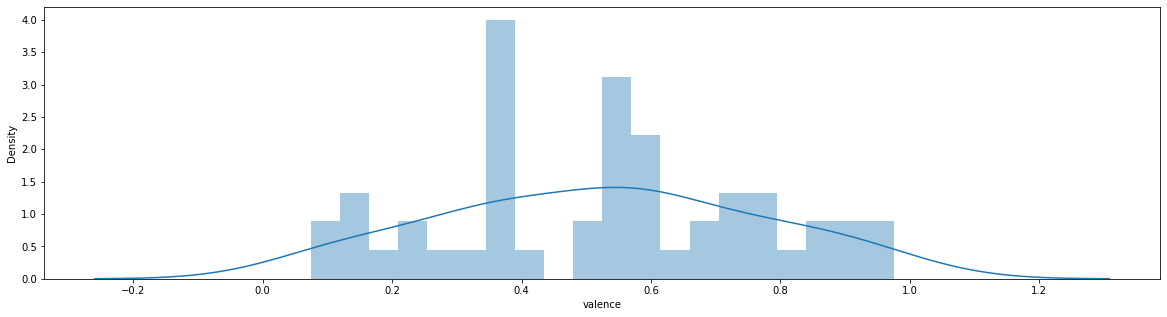

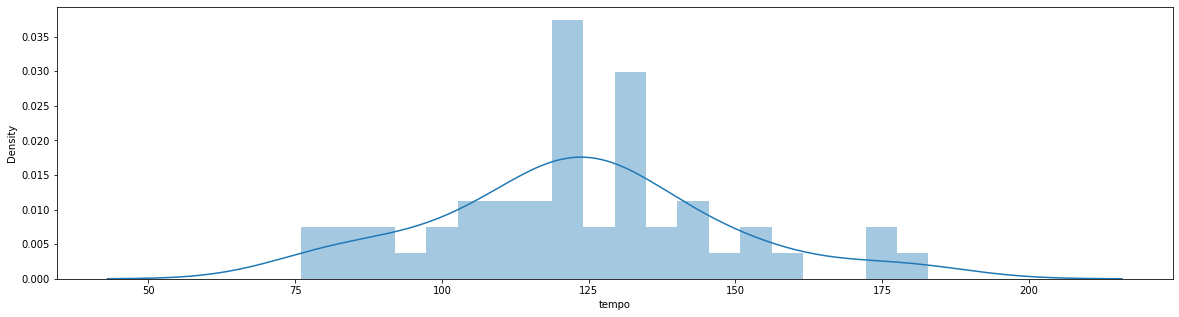

In [12]:
for feature in AUDIO_FEATURES + ['tempo']:
    sns.distplot(audio_analysis_df[feature], hist=True, kde=True, bins=20);
    plt.show();

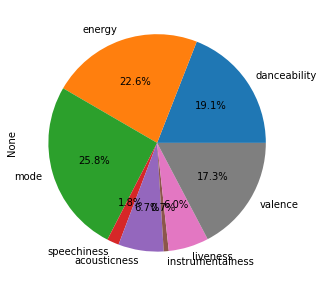

In [13]:
audio_analysis_df[AUDIO_FEATURES].sum().plot.pie(autopct="%.1f%%");

In [14]:
# mode: 0=minor, 1=major
# valence = cheerfulness 

### Create a happy playlist

In [15]:
NUM_SONGS = 10
VALENCE_HAPPY_THRESHOLD = 0.6

In [19]:
happy_songs = []
for track in audio_analysis.keys():
    if audio_analysis[track]['valence'] >= VALENCE_HAPPY_THRESHOLD:
        happy_songs.append(track)
sample_happy_songs = random.sample(happy_songs, NUM_SONGS)    

In [20]:
sample_happy_songs

['spotify:track:734g6YWmx3chJtEzcFwysB',
 'spotify:track:7BgcyPjuBH6PoihhQWzi7p',
 'spotify:track:5MbnqAuNXbvF3VDxkwC5wv',
 'spotify:track:52rCBUn3IYm7hkx8D9JdZp',
 'spotify:track:4Y7XAxTANhu3lmnLAzhWJW',
 'spotify:track:7qoSsgA5aJ8mmxoJrNBocl',
 'spotify:track:0gKKxlsWYiupy2W6HtuvP6',
 'spotify:track:582EVyAFKmKPa1bVPSDurJ',
 'spotify:track:3gvop6gMwnUvGiCfY5iCJK',
 'spotify:track:3R47KOuGuGvmoeQqbODPa3']

In [21]:
spotify.make_playlist(name='Happy', tracks=sample_happy_songs)

Workflow:
- Get recent listening history
- Get saved songs
- Get saved albums -> songs
- Get sentiment for each of these songs

- Choose sentiment
- Filter the library
- Recommend based on artist and track ids